First we are makinga new conda environemnt, by the name of modsim, so that the packages are all localised and do not result in import errors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

Now after importing all the libraries which we require for the modelling, we proceed with importing the data, and cleaning the data

In [2]:
# defining the headers of the table

col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

# defining the number of arrays in the table with the help of numpy
use=list(np.arange(len(col)))

df_air=pd.read_csv('AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)

df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:
df_air.shape

(9471, 15)

```
Sl No 		Attribute 		Description
0 		    Date 		    Date (DD/MM/YYYY)
1 		    Time 		    Time (HH.MM.SS)
2 		    CO(GT) 		    True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3 		    PT08.S1(CO) 	PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4 		    NMHC(GT) 		True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5 		    C6H6(GT) 		True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6 		    PT08.S2(NMHC) 	PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7 		    NOx(GT) 		True hourly averaged NOx concentration in ppb (reference analyzer)
8 		    PT08.S3(NOx) 	PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9 		    NO2(GT) 		True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10 		    PT08.S4(NO2) 	PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11 		    PT08.S5(O3) 	PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12 		    T 		        Temperature in Â°C
13 		    RH 		        Relative Humidity (%)
14 		    AH 		        AH Absolute Humidity
```

Defining all the columns and their meaning, we will now proceed to clean the data prior to modelling the same, to predict

In [4]:
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see there are a lot of records in the given raw data which are empty, and need to be cleaned

In [5]:
df_air.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [6]:
# drop last rows with NaN values
df_air.dropna(how='all', inplace=True)

df_air.dropna(thresh=10, axis = 0, inplace=True)

In [7]:
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


Successfully removed the empty records at the end

In [8]:
df_air.shape

(8991, 15)

## Basic Statistical Analysis

In [9]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## Data cleaning and presentation

In [10]:
# Splitting hour from time into new column

df_air['HOUR'] = df_air['TIME'].apply(lambda x: x.split(':')[0])
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: object

In [11]:
# to find missing values
print(f'Count of missing values: {df_air.shape[0] - df_air.count()}')


Count of missing values: DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


The data has a lot of empty records, which need to be either removed/interpolated

For Interpolating & Removal:

- CO_GT, NOX_GT, NO@_GT will be filled by monthly average of that particular hour
- NHHC_GT will be <strong>dropped</strong> as it has 90% of the data which is missing

In [12]:
df_air['DATE']=pd.to_datetime(df_air.DATE, format='%m/%d/%Y')   #Format date column

In [13]:
# setting the date as the index

df_air.set_index('DATE', inplace= True)

In [14]:
df_air['MONTH'] = df_air.index.month        # run only once, as otherwise it will make multiple month columns which will lead to error later on
df_air.reset_index(inplace=True)


In [15]:
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3


In [16]:
# Dropping the NMHC_GT, lots of missing data

df_air.drop('NMHC_GT', axis=1, inplace=True)

In [17]:
# filling empty values with mean of the data as described above

df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [18]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


In [19]:
# Filling left NaN values with hourly average value

df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

In [20]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64


We have no missing values now. We will now work on the data visualisation, to understand how the data is distributed and understand the correlation between the various attributes

/var/folders/4d/8wg49x6j40bgy_cxdvl9yhrr0000gn/T/ipykernel_20931/2213377092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_air.corr(), annot = True, cmap = 'viridis')


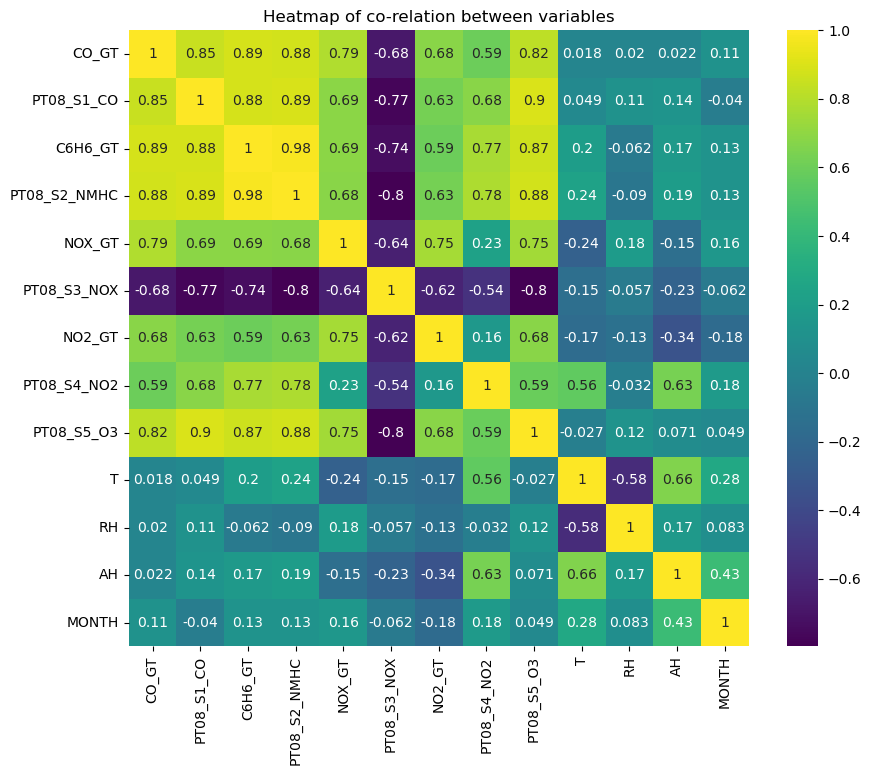

In [37]:
sns.heatmap(df_air.corr(), annot = True, cmap = 'viridis')
plt.title("Heatmap of co-relation between variables")
plt.show()

# export the cleaned CSV to a new file
df_air.to_csv('AirQualityUCI_cleaned.csv', index=False)

Converting the csv to xlsx for use in R

In [38]:
from openpyxl import Workbook
import csv
wb = Workbook()
ws = wb.active
with open("AirQualityUCI_cleaned.csv", 'r') as f:
    for row in csv.reader(f):
        ws.append(row)

wb.save("AirQualityUCI_cleaned.xlsx")